In [48]:
import pandas as pd
data0104 = pd.read_csv("F:\MSc DS\Mini project\DataSet_B02\TstB02_2022-01-04tapes.csv",names=[0,1,2,'price',4,5,6,7,8,9,10])


In [2]:
from matplotlib import pyplot as plt
import gym

In [49]:
data0104= data0104[:500]

In [50]:
data0104 =data0104.iloc[:,[3]]

In [52]:
type(data0104)

pandas.core.frame.DataFrame

In [56]:
data0104['-1price']=data0104['price'].shift(1)
data0104['-2price']=data0104['price'].shift(2)
data0104['-3price']= data0104['price'].shift(3)
data0104['+1price']= data0104['price'].shift(-1)

In [58]:
data0104.dropna()

,price,-1price,-2price,-3price,+1price
3,256,254.0,254.0,253.0,256.0
4,256,256.0,254.0,254.0,256.0
5,256,256.0,256.0,254.0,256.0
6,256,256.0,256.0,256.0,257.0
7,257,256.0,256.0,256.0,258.0
...,...,...,...,...,...
494,263,261.0,262.0,261.0,262.0
495,262,263.0,261.0,262.0,262.0
496,262,262.0,263.0,261.0,262.0
497,262,262.0,262.0,263.0,263.0


In [70]:
data0104['buy_or_sell'] = data0104['+1price']>= data0104['price']

In [74]:
data0104['buy_or_sell'] =data0104['buy_or_sell'].astype(int)


In [75]:
data0104

,price,-1price,-2price,-3price,+1price,buy_or_sell
0,253,NaN,NaN,NaN,254.0,1
1,254,253.0,NaN,NaN,254.0,1
2,254,254.0,253.0,NaN,256.0,1
3,256,254.0,254.0,253.0,256.0,1
4,256,256.0,254.0,254.0,256.0,1
...,...,...,...,...,...,...
495,262,263.0,261.0,262.0,262.0,1
496,262,262.0,263.0,261.0,262.0,1
497,262,262.0,262.0,263.0,263.0,1
498,263,262.0,262.0,262.0,265.0,1


In [80]:
data0104 =data0104.dropna()

In [81]:
X = data0104.iloc[:,[0,1,2,3]]
y = data0104['buy_or_sell']

In [83]:
X.head()
y

3      1
4      1
5      1
6      1
7      1
      ..
494    0
495    1
496    1
497    1
498    1
Name: buy_or_sell, Length: 496, dtype: int32

In [84]:
from sklearn.linear_model import LogisticRegression
lg_reg = LogisticRegression()
lg_reg.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
ynew =lg_reg.predict(X)

In [87]:
print(y)

3      1
4      1
5      1
6      1
7      1
      ..
494    0
495    1
496    1
497    1
498    1
Name: buy_or_sell, Length: 496, dtype: int32


In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(y, ynew)

0.7338709677419355

想写把数据清理下 最简单的先搞个日K 首先写个针对csv的脚本 遍历某个文件 读入其中的csv 文件 得到其中

In [13]:
import os
import pandas as pd
def Getfiles(dir,suffix ='csv'): # find the target file type csv
    files =[] # store the path of files
    for root, directory, files in os.walk(dir):
        for filename in files:
            if filename.endswith(suffix):
                files.append(os.path.join(root,filename))
    return files


In [26]:
import os
import re
pattern =r'(2022.*)(tapes)'
rownames =[]
Open =[]
High =[]
Close =[]
Low = []

for root, directory,files in os.walk('F:\MSc DS\Mini project\DataSet_B02'):
    for filename in files:
        if filename.endswith('csv'):
            filepath =os.path.join(root,filename)
            datacsv = pd.read_csv(filepath,encoding='latin1',names=[0,1,2,'price',4,5,6,7,8,9,10])
            openprice = datacsv['price'][0]
            Open.append(openprice)
            closeprice = datacsv['price'][len(datacsv)-1]
            Close.append(closeprice)
            highprice = max(datacsv['price'])
            High.append(highprice)
            lowprice = min(datacsv['price'])
            Low.append(lowprice)
            matches = re.findall(pattern, filename)
            rowname = matches[0][0]
            rownames.append(rowname)
            

In [37]:
dictprice = {'Open':Open,'High':High,'Low':Low,'Close':Close}
day_K = pd.DataFrame(dictprice,index =rownames)

In [ ]:
import pandas as pd
data0104 = pd.read_csv("F:\MSc DS\Mini project\DataSet_B02\TstB02_2022-01-04tapes.csv",names=[0,1,2,'price',4,5,6,7,8,9,10])
openprice = data0104[0]['price']
highn

In [24]:
import pandas as pd
data0104 = pd.read_csv("F:\MSc DS\Mini project\DataSet_B02\TstB02_2022-01-04tapes.csv",names=[0,1,2,'price',4,5,6,7,8,9,10])

In [38]:
day_K.head()

,Open,High,Low,Close
2022-01-04,253.0,275.0,229.0,241.0
2022-01-05,251.0,260.0,229.0,246.0
2022-01-06,242.0,307.0,236.0,283.0
2022-01-07,286.0,310.0,257.0,263.0
2022-01-10,262.0,278.0,238.0,242.0


In [40]:
day_K.to_pickle('Dataset_B02_day_K.pkl')

In [9]:
max(data0104['price'])

275

In [10]:
min(data0104['price'])

229

In [12]:
import re
pattern =r'(2022.*)(tapes)'
matcches =re.findall(pattern,'TstB02_2022-01-04tapes')

In [43]:

import pandas as pd
 
my_dict = {'i': 1, 'love': 2, 'you': 3}
my_df = pd.DataFrame(my_dict,index=[0]).T
 
print(my_df)

      0
i     1
love  2
you   3


In [17]:
a =3
b = 4
c = 5
pd.DataFrame(a,b,c)

TypeError: object of type 'int' has no len()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [8]:
data = pd.read_pickle('F:\MSc DS\Mini project\datacleanning\Dataset_B02_day_K.pkl')  # load the dataframe

In [9]:
data.head()

,Open,High,Low,Close
2022-01-04,253.0,275.0,229.0,241.0
2022-01-05,251.0,260.0,229.0,246.0
2022-01-06,242.0,307.0,236.0,283.0
2022-01-07,286.0,310.0,257.0,263.0
2022-01-10,262.0,278.0,238.0,242.0


In [11]:
data.index = pd.to_datetime(data.index)

In [13]:
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

In [15]:
data['Open'].values

array([253., 251., 242., 286., 262., 256., 220., 192., 208., 207., 227.,
       200., 192., 213., 202., 209., 246., 239., 197., 180., 186., 162.,
       159., 175., 167., 184., 219., 210., 181., 184., 177., 141., 155.,
       163., 170., 161., 185., 195., 164., 173., 167.])

In [16]:
pdates = mdates.date2num(data.index)

In [17]:
pdates

array([738159., 738160., 738161., 738162., 738165., 738166., 738167.,
       738168., 738169., 738172., 738173., 738174., 738175., 738176.,
       738179., 738180., 738181., 738182., 738183., 738186., 738187.,
       738188., 738189., 738190., 738193., 738194., 738195., 738196.,
       738197., 738200., 738201., 738202., 738203., 738204., 738207.,
       738208., 738209., 738210., 738211., 738214., 738215.])

In [18]:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]

In [19]:
ohlc

[[738159.0, 253.0, 275.0, 229.0, 241.0],
 [738160.0, 251.0, 260.0, 229.0, 246.0],
 [738161.0, 242.0, 307.0, 236.0, 283.0],
 [738162.0, 286.0, 310.0, 257.0, 263.0],
 [738165.0, 262.0, 278.0, 238.0, 242.0],
 [738166.0, 256.0, 257.0, 206.0, 210.0],
 [738167.0, 220.0, 231.0, 189.0, 199.0],
 [738168.0, 192.0, 222.0, 183.0, 212.0],
 [738169.0, 208.0, 222.0, 193.0, 208.0],
 [738172.0, 207.0, 235.0, 198.0, 213.0],
 [738173.0, 227.0, 228.0, 196.0, 214.0],
 [738174.0, 200.0, 219.0, 178.0, 190.0],
 [738175.0, 192.0, 219.0, 179.0, 209.0],
 [738176.0, 213.0, 216.0, 187.0, 200.0],
 [738179.0, 202.0, 209.0, 183.0, 201.0],
 [738180.0, 209.0, 267.0, 191.0, 253.0],
 [738181.0, 246.0, 270.0, 219.0, 231.0],
 [738182.0, 239.0, 239.0, 186.0, 193.0],
 [738183.0, 197.0, 207.0, 171.0, 180.0],
 [738186.0, 180.0, 199.0, 169.0, 179.0],
 [738187.0, 186.0, 188.0, 159.0, 171.0],
 [738188.0, 162.0, 180.0, 153.0, 157.0],
 [738189.0, 159.0, 185.0, 153.0, 175.0],
 [738190.0, 175.0, 187.0, 158.0, 167.0],
 [738193.0, 167.

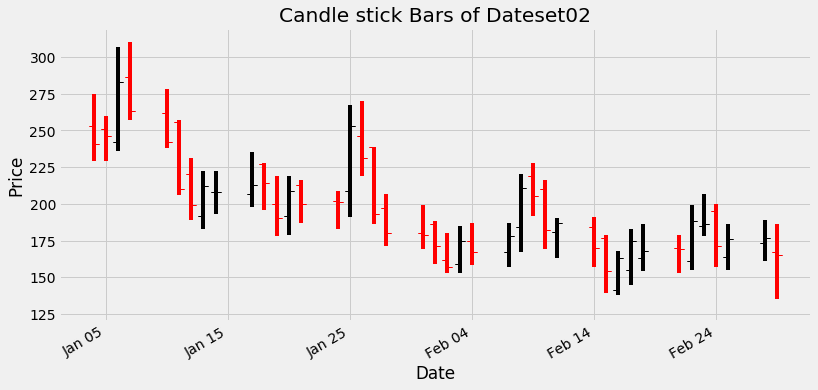

In [27]:
import mpl_finance as mpf # This is the old mpl-finance library - note the '_' in the library name

# We can now feed the ohlc matrix into mpl-finance to create a candle stick chart:

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mpf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Candle stick Bars of Dateset02')
ax.set_ylim(120,320)
# Choosing to display the dates as "Month Day":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

# This is to automatically arrange the date labels in a readable way:
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

In [2]:
# 这个日k 数据有点少 想数据多点 因此
import pandas as pd
data0104 = pd.read_csv("F:\MSc DS\Mini project\DataSet_B02\TstB02_2022-01-04tapes.csv",names=[0,1,'time','price',4,5,6,7,8,9,10])


In [3]:
data0104.head()

,0,1,time,price,4,5,6,7,8,9,10
0,TstB02_2022-01-04,Exch0Lit,10.778,253,{'pool_id': 'Exch0Lit','type': 'Trade','time': 10.778,'price': 253,'qty': 1,'party1': 'S01','party2': 'B08'}
1,TstB02_2022-01-04,Exch0Lit,12.631,254,{'pool_id': 'Exch0Lit','type': 'Trade','time': 12.631,'price': 254,'qty': 1,'party1': 'S03','party2': 'B22'}
2,TstB02_2022-01-04,Exch0Lit,12.835,254,{'pool_id': 'Exch0Lit','type': 'Trade','time': 12.835,'price': 254,'qty': 4,'party1': 'S03','party2': 'B12'}
3,TstB02_2022-01-04,Exch0Lit,14.144,256,{'pool_id': 'Exch0Lit','type': 'Trade','time': 14.144,'price': 256,'qty': 1,'party1': 'S10','party2': 'B12'}
4,TstB02_2022-01-04,Exch0Lit,14.484,256,{'pool_id': 'Exch0Lit','type': 'Trade','time': 14.484,'price': 256,'qty': 1,'party1': 'S10','party2': 'B28'}


In [4]:
data0104['time']

0           10.778
1           12.631
2           12.835
3           14.144
4           14.484
           ...    
34255    30598.827
34256    30599.184
34257    30599.320
34258    30599.422
34259    30599.422
Name: time, Length: 34260, dtype: float64

In [31]:
find_600 =[]
count = 1
for i in range(len(data0104)-1):
    if data0104['time'][i] <600* count and data0104['time'][i+1] >= 600*count:
        find_600.append(data0104['price'][i])
        count = count+1

In [32]:
find_600

[262,
 263,
 262,
 256,
 252,
 262,
 257,
 261,
 262,
 257,
 253,
 252,
 253,
 258,
 250,
 252,
 248,
 239,
 239,
 242,
 243,
 242,
 245,
 242,
 242,
 241,
 243,
 232,
 237,
 247,
 243,
 244,
 234,
 242,
 246,
 247,
 244,
 242,
 237,
 249,
 245,
 247,
 241,
 249,
 242,
 245,
 245,
 244,
 243,
 242]

KeyError: "None of [Int64Index([  655,  1301,  1979,  2631,  3283,  3901,  4542,  5169,  5796,\n             6408,  7051,  7681,  8336,  8996,  9670, 10391, 11085, 11777,\n            12473, 13189, 13896, 14597, 15315, 16005, 16694, 17376, 18074,\n            18732, 19423, 20094, 20727, 21401, 22083, 22780, 23448, 24149,\n            24839, 25523, 26207, 26913, 27556, 28206, 28900, 29583, 30265,\n            30950, 31612, 32293, 32962, 33606],\n           dtype='int64')] are in the [columns]"

In [28]:
datanew

0        TstB02_2022-01-04
1        TstB02_2022-01-04
2        TstB02_2022-01-04
3        TstB02_2022-01-04
4        TstB02_2022-01-04
               ...        
34255    TstB02_2022-01-04
34256    TstB02_2022-01-04
34257    TstB02_2022-01-04
34258    TstB02_2022-01-04
34259    TstB02_2022-01-04
Name: 0, Length: 34260, dtype: object

In [2]:
import os
import re
import pandas as pd
pattern =r'(2022.*)(tapes)'
closeprice_10min =[]

for root, directory,files in os.walk('F:\MSc DS\Mini project\DataSet_B02'):
    for filename in files:
        if filename.endswith('csv'):
            filepath =os.path.join(root,filename)
            datacsv = pd.read_csv(filepath,encoding='latin1',names=[0,1,'time','price',4,5,6,7,8,9,10])
            count =1
            close_tmp =[]
            for i in range(len(datacsv)-1):
                if datacsv['time'][i] <600* count and datacsv['time'][i+1] >= 600*count:
                    close_tmp.append(datacsv['price'][i])
                    count = count+1
            close_tmp.append(datacsv['price'][len(datacsv)-1])
            print(len(close_tmp))
            closeprice_10min += close_tmp
                
                
            

51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
38


In [71]:
import pickle
output = open('F:\MSc DS\Mini project\datacleanning\Dataset_B02_10mins.pkl', 'wb')
pickle.dump(closeprice_10min, output)
output.close()

In [4]:
import math
testsize =math.floor(totalsize*0.2)
valsize = testsize
trainsize = totalsize - testsize- valsize

In [5]:
traindata = closeprice_10min[:trainsize]

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
x = [ i for i in range(trainsize)]

In [68]:
traindata

[262,
 263,
 262,
 256,
 252,
 262,
 257,
 261,
 262,
 257,
 253,
 252,
 253,
 258,
 250,
 252,
 248,
 239,
 239,
 242,
 243,
 242,
 245,
 242,
 242,
 241,
 243,
 232,
 237,
 247,
 243,
 244,
 234,
 242,
 246,
 247,
 244,
 242,
 237,
 249,
 245,
 247,
 241,
 249,
 242,
 245,
 245,
 244,
 243,
 242,
 241,
 243,
 241,
 240,
 245,
 245,
 247,
 246,
 250,
 253,
 254,
 241,
 244,
 247,
 247,
 244,
 238,
 236,
 235,
 249,
 248,
 244,
 248,
 239,
 242,
 242,
 239,
 245,
 237,
 236,
 239,
 236,
 235,
 236,
 242,
 244,
 240,
 238,
 244,
 248,
 253,
 247,
 253,
 246,
 241,
 243,
 239,
 246,
 254,
 244,
 243,
 246,
 245,
 245,
 254,
 251,
 254,
 244,
 237,
 244,
 245,
 249,
 245,
 251,
 251,
 252,
 254,
 248,
 243,
 251,
 256,
 250,
 253,
 246,
 249,
 255,
 264,
 256,
 252,
 254,
 251,
 251,
 262,
 271,
 272,
 274,
 266,
 271,
 277,
 281,
 278,
 282,
 288,
 281,
 284,
 287,
 291,
 294,
 288,
 290,
 299,
 297,
 283,
 286,
 295,
 293,
 290,
 290,
 289,
 290,
 293,
 308,
 292,
 295,
 298,
 290,
 296

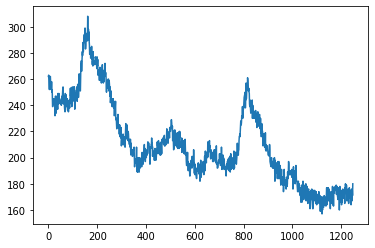

In [8]:
plt.plot(x, traindata)

In [10]:
data1.head()

,price_10
0,262
1,263
2,262
3,256
4,252


In [25]:
# 计算过去五个点平均值 计算未来五个点平均值
def ma5(list1):
    newlist = []
    for i in range(len(list1)):
        if i <4:
            ave = list1[i]
            newlist.append(ave)
        else:
            ave = 1.0* sum(list1[i-4:i+1])/5
            newlist.append(ave)
    return newlist



In [26]:
def ma10(list1):
    newlist = []
    for i in range(len(list1)):
        if i <9:
            ave = list1[i]
            newlist.append(ave)
        else:
            ave = sum(list1[i-9:i+1])/10
            newlist.append(ave)
    return newlist

In [59]:
def ma30(list1):
    newlist = []
    for i in range(len(list1)):
        if i <29:
            ave = list1[i]
            newlist.append(ave)
        else:
            ave = sum(list1[i-29:i+1])/30
            newlist.append(ave)
    return newlist

In [60]:
MA5 =ma5(traindata)
MA10 =ma30(traindata)


In [61]:
dict1 = {'price_10': traindata, 'MA10': MA5, 'MA30': MA10}
data1 = pd.DataFrame(dict1)

In [62]:
data1.head()

,price_10,MA10,MA30
0,262,262.0,262.0
1,263,263.0,263.0
2,262,262.0,262.0
3,256,256.0,256.0
4,252,259.0,252.0


In [64]:
data1 = data1.assign(hold_or_not = (data1['MA10']>data1['MA30']).astype(int))

In [65]:
data1 = data1.assign(bull_or_sell = data1['hold_or_not'].diff())

In [66]:
pd.set_option("display.max_rows",1500)
data1

,price_10,MA10,MA30,hold_or_not,bull_or_sell
0,262,262.0,262.000000,0,NaN
1,263,263.0,263.000000,0,0.0
2,262,262.0,262.000000,0,0.0
3,256,256.0,256.000000,0,0.0
4,252,259.0,252.000000,1,1.0
5,262,259.0,262.000000,0,-1.0
6,257,257.8,257.000000,1,1.0
7,261,257.6,261.000000,0,-1.0
8,262,258.8,262.000000,0,0.0
9,257,259.8,257.000000,1,1.0


In [67]:
def trading(df,initial_money =1):
    for i in range(df.shape[0]):
        state = df['bull_or_sell'][i]
        money = initial_money
        if state == 1:
            bullprice = df['price_10'][i]
            print('{}mins，buy at {}'.format((i+1)*10, bullprice))
        if state == -1:
            sellprice = df['price_10'][i]
            money = money*(sellprice/bullprice)
            total_revenue_rate =  (money - initial_money)/initial_money
            print('{}mins, sell at {}，total_gain:{}'.format((i+1)*10, sellprice,(money - initial_money)))
    return (money, total_revenue_rate)
    

In [68]:
trading(data1)

50mins，buy at 252
60mins, sell at 262，total_gain:0.039682539682539764
70mins，buy at 257
80mins, sell at 261，total_gain:0.015564202334630295
100mins，buy at 257
140mins, sell at 258，total_gain:0.0038910505836575737
150mins，buy at 250
210mins, sell at 243，total_gain:-0.028000000000000025
240mins，buy at 242
270mins, sell at 243，total_gain:0.004132231404958775
280mins，buy at 232
300mins, sell at 247，total_gain:0.06465517241379315
420mins，buy at 247
520mins, sell at 243，total_gain:-0.01619433198380571
570mins，buy at 247
660mins, sell at 244，total_gain:-0.012145748987854255
730mins，buy at 248
750mins, sell at 242，total_gain:-0.024193548387096753
900mins，buy at 248
1120mins, sell at 249，total_gain:0.0040322580645162365
1140mins，buy at 251
1700mins, sell at 279，total_gain:0.11155378486055767
2330mins，buy at 272
2380mins, sell at 257，total_gain:-0.05514705882352944
3180mins，buy at 226
3310mins, sell at 213，total_gain:-0.05752212389380529
3810mins，buy at 199
4180mins, sell at 205，total_gain:0.030

(1, -0.046242774566473965)

In [1]:
import pickle

savedlist = open('F:\MSc DS\Mini project\datacleanning\Dataset_B02_10mins.pkl', 'rb')

data2 = pickle.load(savedlist)

In [74]:
data2

[262,
 263,
 262,
 256,
 252,
 262,
 257,
 261,
 262,
 257,
 253,
 252,
 253,
 258,
 250,
 252,
 248,
 239,
 239,
 242,
 243,
 242,
 245,
 242,
 242,
 241,
 243,
 232,
 237,
 247,
 243,
 244,
 234,
 242,
 246,
 247,
 244,
 242,
 237,
 249,
 245,
 247,
 241,
 249,
 242,
 245,
 245,
 244,
 243,
 242,
 241,
 243,
 241,
 240,
 245,
 245,
 247,
 246,
 250,
 253,
 254,
 241,
 244,
 247,
 247,
 244,
 238,
 236,
 235,
 249,
 248,
 244,
 248,
 239,
 242,
 242,
 239,
 245,
 237,
 236,
 239,
 236,
 235,
 236,
 242,
 244,
 240,
 238,
 244,
 248,
 253,
 247,
 253,
 246,
 241,
 243,
 239,
 246,
 254,
 244,
 243,
 246,
 245,
 245,
 254,
 251,
 254,
 244,
 237,
 244,
 245,
 249,
 245,
 251,
 251,
 252,
 254,
 248,
 243,
 251,
 256,
 250,
 253,
 246,
 249,
 255,
 264,
 256,
 252,
 254,
 251,
 251,
 262,
 271,
 272,
 274,
 266,
 271,
 277,
 281,
 278,
 282,
 288,
 281,
 284,
 287,
 291,
 294,
 288,
 290,
 299,
 297,
 283,
 286,
 295,
 293,
 290,
 290,
 289,
 290,
 293,
 308,
 292,
 295,
 298,
 290,
 296

In [114]:
def min20(list1):
    newlist = [list1[0]]
    for i in range(1,len(list1)):
        if i <20:
            min20 = min(list1[:i])
            newlist.append(min20)
        else:
            min20 = min(list1[i-20:i])
            newlist.append(min20)
    return newlist

def max20(list1):
    newlist = [list1[0]]
    for i in range(1,len(list1)):
        if i <20:
            max20 = max(list1[:i])
            newlist.append(max20)
        else:
            max20 = max(list1[i-20:i])
            newlist.append(max20)
    return newlist

In [115]:
Min20 =min20(traindata)
Max20 =max20(traindata)

In [116]:
dict2 = {'price_10': traindata, 'Min20': Min20, 'Max20': Max20}
data2 = pd.DataFrame(dict2)

In [118]:
data2

,price_10,Min20,Max20
0,262,262,262
1,263,262,262
2,262,262,263
3,256,262,263
4,252,256,263
5,262,252,263
6,257,252,263
7,261,252,263
8,262,252,263
9,257,252,263


In [119]:
def trading(df,initial_money =1,maxgap =2,mingap=0,fake_pointsnumber =5):
    hold =0 # o repr no share 1 repr all equity
    points =0
    for i in range(df.shape[0]):
        money = initial_money
        if  hold ==0 and df['price_10'][i] > df['Max20'][i]+ maxgap:
            buyprice = df['price_10'][i]
            print('{}mins，buy at {}'.format((i+1)*10, buyprice))
            hold =1
            
        if hold ==1 and df['price_10'][i]< buyprice:
            points =points+1
            if points == fake_pointsnumber:
                sellprice = df['price_10'][i]
                money = money*(sellprice/buyprice)
                total_gain =  money - initial_money
                print('{}mins, sell at {}，total_gain:{}'.format((i+1)*10, sellprice,total_gain))
                hold =0
                points =0
                
                
        
        
        if hold ==1 and df['price_10'][i] < df['Min20'][i]-mingap:
            sellprice = df['price_10'][i]
            money = money*(sellprice/buyprice)
            total_gain =  money - initial_money
            print('{}mins, sell at {}，total_gain:{}'.format((i+1)*10, sellprice,total_gain))
            hold =0
    return (money,total_gain)
        

In [120]:
trading(data2)

600mins，buy at 253
660mins, sell at 244，total_gain:-0.035573122529644285
910mins，buy at 253
970mins, sell at 239，total_gain:-0.055335968379446654
1270mins，buy at 264
1320mins, sell at 251，total_gain:-0.0492424242424242
1340mins，buy at 271
1700mins, sell at 279，total_gain:0.029520295202952074
3180mins，buy at 226
3220mins, sell at 222，total_gain:-0.017699115044247815
3850mins，buy at 204
3900mins, sell at 202，total_gain:-0.009803921568627416
3940mins，buy at 210
3990mins, sell at 202，total_gain:-0.03809523809523807
4240mins，buy at 215
4290mins, sell at 201，total_gain:-0.06511627906976747
4470mins，buy at 212
4530mins, sell at 207，total_gain:-0.02358490566037741
4860mins，buy at 222
4910mins, sell at 211，total_gain:-0.0495495495495496
5040mins，buy at 228
5100mins, sell at 213，total_gain:-0.06578947368421051
5960mins，buy at 206
6010mins, sell at 187，total_gain:-0.09223300970873782
6410mins，buy at 201
6470mins, sell at 200，total_gain:-0.00497512437810943
6540mins，buy at 212
6590mins, sell at 21

(1, -0.022222222222222254)

In [121]:
data2

,price_10,Min20,Max20
0,262,262,262
1,263,262,262
2,262,262,263
3,256,262,263
4,252,256,263
5,262,252,263
6,257,252,263
7,261,252,263
8,262,252,263
9,257,252,263


In [108]:
data2

,price_10,Min20,Max40
0,262,262,262
1,263,262,262
2,262,262,263
3,256,262,263
4,252,256,263
5,262,252,263
6,257,252,263
7,261,252,263
8,262,252,263
9,257,252,263


In [2]:
import pickle

savedlist = open('F:\MSc DS\Mini project\datacleanning\Dataset_B02_10mins.pkl', 'rb')

data2 = pickle.load(savedlist)

In [3]:
data2

[262,
 263,
 262,
 256,
 252,
 262,
 257,
 261,
 262,
 257,
 253,
 252,
 253,
 258,
 250,
 252,
 248,
 239,
 239,
 242,
 243,
 242,
 245,
 242,
 242,
 241,
 243,
 232,
 237,
 247,
 243,
 244,
 234,
 242,
 246,
 247,
 244,
 242,
 237,
 249,
 245,
 247,
 241,
 249,
 242,
 245,
 245,
 244,
 243,
 242,
 241,
 243,
 241,
 240,
 245,
 245,
 247,
 246,
 250,
 253,
 254,
 241,
 244,
 247,
 247,
 244,
 238,
 236,
 235,
 249,
 248,
 244,
 248,
 239,
 242,
 242,
 239,
 245,
 237,
 236,
 239,
 236,
 235,
 236,
 242,
 244,
 240,
 238,
 244,
 248,
 253,
 247,
 253,
 246,
 241,
 243,
 239,
 246,
 254,
 244,
 243,
 246,
 245,
 245,
 254,
 251,
 254,
 244,
 237,
 244,
 245,
 249,
 245,
 251,
 251,
 252,
 254,
 248,
 243,
 251,
 256,
 250,
 253,
 246,
 249,
 255,
 264,
 256,
 252,
 254,
 251,
 251,
 262,
 271,
 272,
 274,
 266,
 271,
 277,
 281,
 278,
 282,
 288,
 281,
 284,
 287,
 291,
 294,
 288,
 290,
 299,
 297,
 283,
 286,
 295,
 293,
 290,
 290,
 289,
 290,
 293,
 308,
 292,
 295,
 298,
 290,
 296

In [13]:
def emaslow(list1):
    newlist=[list1[0]]
    for i in range(1,len(list1)):
        ema = 11/13* newlist[i-1] +2/13* list1[i]
        newlist.append(ema)
    return newlist
def emafast(list1):
    newlist=[list1[0]]
    for i in range(1,len(list1)):
        ema = 25/27* newlist[i-1] +2/27* list1[i]
        newlist.append(ema)
    return newlist



In [14]:
def diff(list1,list2):
    newlist =[]
    for i in range(len(list1)):
        ele = list1[i]-list2[i]
        newlist.append(ele)
    return newlist

def avg9(list1):
    newlist =[]
    for i in range(len(list1)):
        if i <9:
            ele = sum(list1[:i+1])/(i+1)
            newlist.append(ele)
        else:
            ele = sum(list1[i-8:i+1])/9
            newlist.append(ele)
    return newlist


In [15]:
ema12 =emaslow(data2)
ema26= emafast(data2)
macd = diff(ema12,ema26)
macdavg = avg9(macd)

In [19]:
dict3 ={'price':data2,'MACD': macd,'MACD_AVG':macdavg}

In [20]:
import pandas as pd
data3 = pd.DataFrame(dict3)

In [22]:
data3= data3.assign(hist = data3['MACD']- data3['MACD_AVG'])

In [23]:
data3

,price,MACD,MACD_AVG,hist
0,262.0,0.000000,0.000000,0.000000
1,263.0,0.079772,0.039886,0.039886
2,262.0,0.061590,0.047121,0.014470
3,256.0,-0.431989,-0.072657,-0.359332
4,252.0,-1.132862,-0.284698,-0.848164
...,...,...,...,...
2073,153.0,-1.627273,-2.761648,1.134374
2074,151.0,-1.804104,-2.529288,0.725185
2075,158.0,-1.363682,-2.256372,0.892690
2076,159.0,-0.923310,-1.981380,1.058071


In [28]:
def trading(df,initial_money =1):
    hold =0 # o repr no share 1 repr all equity
    for i in range(df.shape[0]):
        money = initial_money
        if  hold ==0 and df['hist'][i] > 0:
            buyprice = df['price'][i]
            print('{}mins，buy at {}'.format((i+1)*10, buyprice))
            hold =1
            
        if hold ==1 and df['hist'][i] < 0:
            sellprice = df['price'][i]
            money = money*(sellprice/buyprice)
            total_gain =  money - initial_money
            print('{}mins, sell at {}，total_gain:{}'.format((i+1)*10, sellprice,total_gain))
            hold =0            
    return (money,total_gain)
        

In [29]:
trading(data3)

20mins，buy at 263.0
40mins, sell at 256.0，total_gain:-0.026615969581749055
270mins，buy at 243.0
280mins, sell at 232.0，total_gain:-0.04526748971193417
300mins，buy at 247.0
510mins, sell at 241.0，total_gain:-0.02429149797570851
560mins，buy at 245.0
660mins, sell at 244.0，total_gain:-0.004081632653061273
730mins，buy at 248.0
760mins, sell at 242.0，total_gain:-0.024193548387096753
860mins，buy at 244.0
970mins, sell at 239.0，total_gain:-0.020491803278688492
990mins，buy at 254.0
1010mins, sell at 243.0，total_gain:-0.04330708661417326
1050mins，buy at 254.0
1090mins, sell at 237.0，total_gain:-0.06692913385826771
1150mins，buy at 251.0
1190mins, sell at 243.0，total_gain:-0.031872509960159334
1200mins，buy at 251.0
1240mins, sell at 246.0，total_gain:-0.019920318725099584
1260mins，buy at 255.0
1320mins, sell at 251.0，total_gain:-0.015686274509803977
1330mins，buy at 262.0
1530mins, sell at 283.0，total_gain:0.08015267175572527
1890mins，buy at 273.0
2020mins, sell at 270.0，total_gain:-0.0109890109890

(1, -0.15083798882681565)

In [2]:
import pandas as pd
data = pd.read_pickle('F:\MSc DS\Mini project\datacleanning\Dataset_B02_10mins_OHLCV.pkl')  # load the dataframe

In [3]:
data.head()

,Open,High,Low,Close,Volume
0,253,275,253,262,316346
1,268,272,254,263,310547
2,259,272,252,262,323198
3,262,272,250,256,317700
4,259,271,251,252,318941


In [9]:
type(data)

pandas.core.frame.DataFrame

In [12]:
from stockstats import StockDataFrame as Sdf
stockstats_df = Sdf.retype(data.copy())
data['cci'] =stockstats_df['cci']
data['macdh'] = stockstats_df['macdh']

C:\ProgramData\Anaconda3\lib\site-packages\stockstats.py:483: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  lambda x: np.fabs(x - x.mean()).mean())


In [14]:
data['kdjk'] =stockstats_df['kdjk']

In [15]:
data.head()

,Open,High,Low,Close,Volume,cci,macdh,kdjk
0,253,275,253,262,316346,NaN,0.000000,46.969697
1,268,272,254,263,310547,-66.666667,0.009972,46.464646
2,259,272,252,262,323198,-100.000000,-0.008785,45.469185
3,262,272,250,256,317700,-133.333333,-0.156490,38.312790
4,259,271,251,252,318941,-105.855856,-0.305341,28.208526


In [18]:
data = pd.read_pickle('F:\MSc DS\Mini project\datacleanning\Dataset_B02_10mins_OHLCV.pkl')
stockstats_df = Sdf.retype(data.copy())
data['cci'] =stockstats_df['cci']
data['kdj'] =stockstats_df['kdjk']
data['macd'] = stockstats_df['macdh']
data.fillna(method='bfill',inplace=True)
data =data.round(4)

C:\ProgramData\Anaconda3\lib\site-packages\stockstats.py:483: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  lambda x: np.fabs(x - x.mean()).mean())


In [19]:
data.head()

,Open,High,Low,Close,Volume,cci,kdj,macd
0,253,275,253,262,316346,-66.6667,46.9697,0.0000
1,268,272,254,263,310547,-66.6667,46.4646,0.0100
2,259,272,252,262,323198,-100.0000,45.4692,-0.0088
3,262,272,250,256,317700,-133.3333,38.3128,-0.1565
4,259,271,251,252,318941,-105.8559,28.2085,-0.3053


In [20]:
data.Close

0       262
1       263
2       262
3       256
4       252
       ... 
2035    184
2036    170
2037    184
2038    179
2039    177
Name: Close, Length: 2040, dtype: int64

In [21]:
import numpy as np


In [23]:
e = np.arange(10)

In [36]:
a =e.reshape(1,10)

In [25]:
a

array([[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]])

In [33]:
np.squeeze(a,axis=(0,1))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [37]:
a.shape[1]

10

In [38]:
np.arange(0,10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])